In [1]:
import numpy as np
import pandas as pd
import random
import os
working_dir = "/Users/nkarisan/PycharmProjects/BTC_Cell_Line_Atlas_Manuscript"
os.chdir(working_dir)

import BTC_Cell_Line_Atlas_Manuscript.scripts.io_library as io_library
io_library.input_dir = 'input_data/'
io_library.output_dir = 'Figure4/output_fig4/'
from BTC_Cell_Line_Atlas_Manuscript.scripts.io_library import MyLib
from BTC_Cell_Line_Atlas_Manuscript.scripts.utils import Utils
from BTC_Cell_Line_Atlas_Manuscript.scripts.visualization import MyVisualization

In [2]:
import matplotlib
seed = 2023
random.seed(seed)
np.random.seed(seed)

matplotlib.use("nbagg")


%matplotlib inline
%config InlineBackend.figure_format = "retina"


%load_ext autoreload
%autoreload 2

# Load data

In [3]:
gene_effect_file = 'Main_Data/CRISPR/CRISPR.csv'
gene_effect_df = MyLib.load_csv(gene_effect_file, index_col=0)
gene_effect_df = gene_effect_df.T
gene_effect_df = gene_effect_df.dropna(axis=1)
gene_effect_df = gene_effect_df.rename(columns={c:c.split(' (')[0] for c in gene_effect_df.columns})

upset_file = 'cell_lines_master_upset_2024-4-13.csv'
raw_upset_df = MyLib.load_csv(upset_file, index_col=0)
# raw_upset_df.set_index('Cell_line', inplace=True, drop=True)
upset_df = raw_upset_df[(raw_upset_df['CRISPR']==1) & (raw_upset_df['Subtype'] != 'HCC')].copy()
upset_df = upset_df[["Subtype", 'DepMap_ID', 'RNA']]
print('upset shape:', upset_df.shape)
gene_effect_df = gene_effect_df.loc[upset_df.index,:]

rna_file = 'Main_Data/RNA/rna_cell_lines.csv'
all_rna_df = MyLib.load_csv(rna_file, index_col=0).T
rna_upset_df = raw_upset_df[(raw_upset_df['RNA']==1) & (raw_upset_df['Subtype'] != 'HCC')].copy()
rna_df = all_rna_df.loc[rna_upset_df.index, :]
print('RNA shape:', rna_df.shape)

ccle_cripsr_file = 'Additional_Data/DepMap/CRISPRGeneEffect_internal-23q2-1e49_v97_filtered_by_public_ids.csv'
ccle_crispr_df = MyLib.load_csv(ccle_cripsr_file, index_col=0)
ccle_crispr_df = ccle_crispr_df.rename(columns={c:c.split(' (')[0] for c in ccle_crispr_df.columns})
other_ccle_crispr_df = ccle_crispr_df[~ccle_crispr_df.index.isin(upset_df['DepMap_ID'])]


input_data/Main_Data/CRISPR/CRISPR.csv  is loaded, shape:  (18443, 60)

input_data/cell_lines_master_upset_2024-4-13.csv  is loaded, shape:  (87, 10)

upset shape: (39, 3)
input_data/Main_Data/RNA/rna_cell_lines.csv  is loaded, shape:  (17649, 79)

RNA shape: (56, 17649)
input_data/Additional_Data/DepMap/CRISPRGeneEffect_internal-23q2-1e49_v97_filtered_by_public_ids.csv  is loaded, shape:  (1100, 18443)



In [4]:
points_color = '#6b676e'
line_color = '#C1914B'#'#a63603'

# AC

In [5]:
ac_upset_df = upset_df[upset_df['Subtype'] == 'AC']
ac_upset_df

,Subtype,DepMap_ID,RNA
Cell_line,,,
SNU869,AC,ACH-000182,1.0
SNU478,AC,ACH-000377,1.0
TGBC52TKB,AC,ACH-001862,1.0
AOVC1,AC,ACH-001997,1.0
TGBC18TKB,AC,ACH-002023,NaN


## TUBB4B

Figure4/output_fig4/TUBB4B_ridge_plot.pdf


<Figure size 216x144 with 0 Axes>

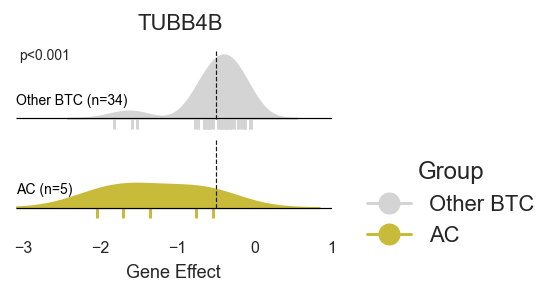

In [6]:
gene = 'TUBB4B'
color_dic = {'Other BTC': {'Other BTC': '#d4d4d4'}, 'AC':{'AC': '#c9bb3a'}}
color_rug_dic = color_dic
df, p_value = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], ac_upset_df, label1='AC', label2='Other BTC', id_vars='Cell_line')
df = df.rename(columns={'value': 'Gene Effect'})

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect',  xlim_left=-3.1, xlim_right=1, aspect=4, title='TUBB4B',  p_value_l=[p_value], vline_offset=0.17, rug_plot_height=0.2,  xtick_step=1, levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='TUBB4B')

p-value:  0.001643644681000294


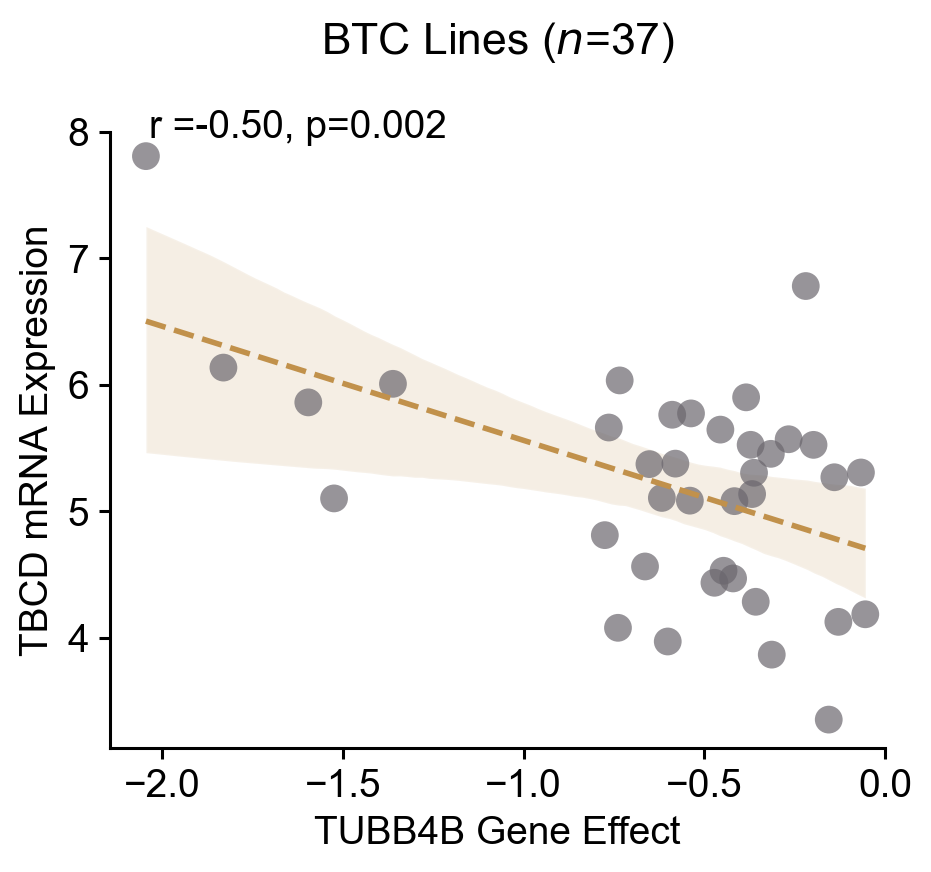

In [7]:
x_gene = 'TUBB4B'
y_gene = 'TBCD'
x, y = Utils.match_rows_df(rna_df[[y_gene]], gene_effect_df[[x_gene]])
df = pd.concat([x, y], axis=1)

MyVisualization.reg_plot(data_df=df, x_col=x_gene, y_col=y_gene, title=f'BTC Lines ($n$={df.shape[0]})', points_color_code=points_color, line_color_code=line_color, xlabel=f'TUBB4B Gene Effect',  ylabel=f'{y_gene} mRNA Expression', marker='o', ylim_top=8, xlim_right=0, title_height=1.1, text_height=.99,  file_name=f'{x_gene}_{y_gene}')

## SLC7A5

In [8]:
cur_gene_effect_df, other_ccle_crispr_df = Utils.match_columns_df(gene_effect_df, other_ccle_crispr_df)

ac_gene_effect_df = cur_gene_effect_df.loc[ac_upset_df.index]
combined_ac_otherccle_crispr_df = pd.concat([other_ccle_crispr_df, ac_gene_effect_df])
combined_ac_otherccle_crispr_df.shape

(1066, 17787)

Figure4/output_fig4/SLC7A5_ridge_plot.pdf


<Figure size 300x200 with 0 Axes>

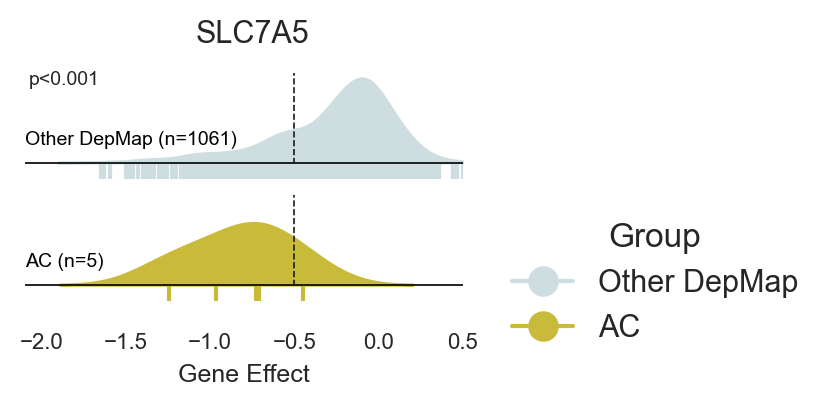

In [9]:
gene = 'SLC7A5'
color_dic = {'Other DepMap': {'Other DepMap': '#CEDEE0'}, 'AC':{'AC': '#c9bb3a'}}
color_rug_dic = color_dic
df, p_value = Utils.prepare_data_for_hue_plots(combined_ac_otherccle_crispr_df[[gene]], ac_upset_df, label1='AC', label2='Other DepMap')
df = df.rename(columns={'value': 'Gene Effect'})

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect',  xlim_left=-2.1, xlim_right=.5, aspect=4, title='SLC7A5',  p_value_l=[p_value], vline_offset=0.18, rug_plot_height=0.3,xtick_step=.5,levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='SLC7A5')

## SLC7A5 vs SLC7A8

In [10]:
ac_rna_upset_df = upset_df[(upset_df['Subtype']=='AC') & (upset_df['RNA']==1)]
ac_rna_upset_df

,Subtype,DepMap_ID,RNA
Cell_line,,,
SNU869,AC,ACH-000182,1.0
SNU478,AC,ACH-000377,1.0
TGBC52TKB,AC,ACH-001862,1.0
AOVC1,AC,ACH-001997,1.0


In [11]:
ac_rna_df = rna_df.loc[ac_rna_upset_df.index]
ac_crispr_df = gene_effect_df.loc[ac_rna_upset_df.index]
ac_crispr_df[['SLC7A5']]

Gene,SLC7A5
Cell_line,
SNU869,-0.967936
SNU478,-0.726119
TGBC52TKB,-1.242721
AOVC1,-0.447350


p-value:  0.021833960099665983


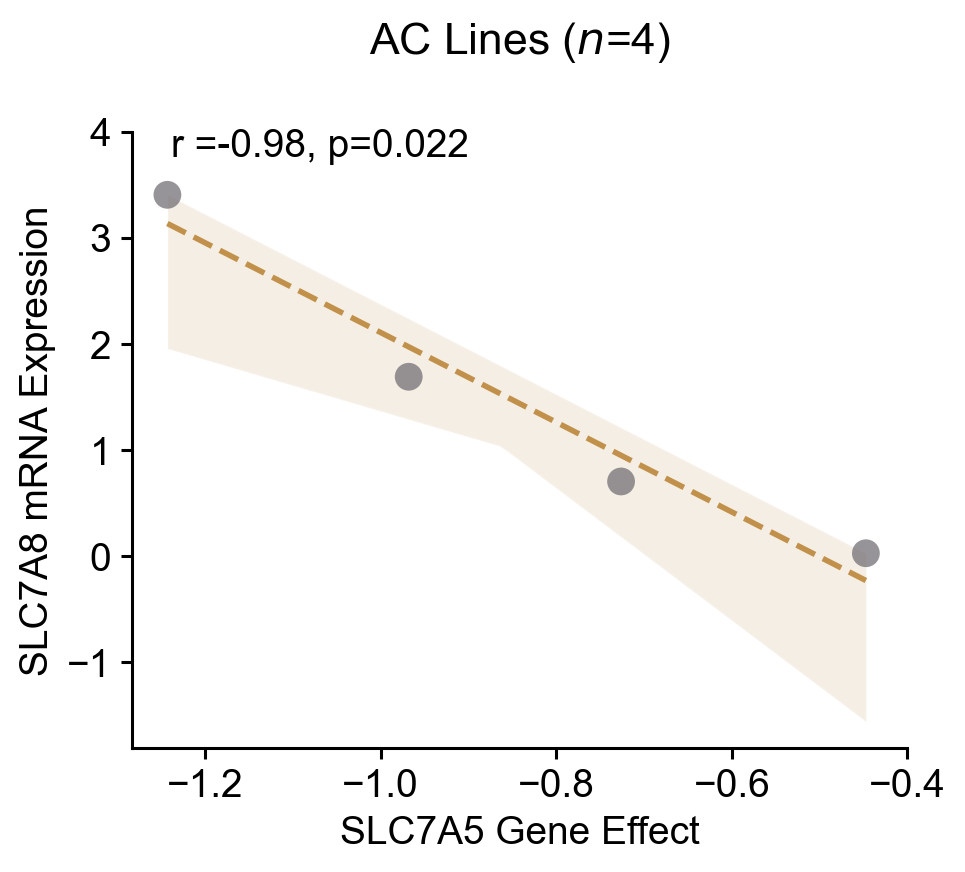

In [12]:
x_gene = 'SLC7A5'
y_gene = 'SLC7A8'
y, x = Utils.match_rows_df(ac_rna_df[[y_gene]], ac_crispr_df[[x_gene]])
df = pd.concat([y, x], axis=1)

MyVisualization.reg_plot(data_df=df, x_col=x_gene, y_col=y_gene, title=f'AC Lines ($n$={df.shape[0]})', points_color_code=points_color, line_color_code=line_color, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression', marker='o', title_height=1.1, text_height=.96,  ylim_top=4, xlim_right=-0.4,  title_fontsize=16, file_name=f'{x_gene}_{y_gene}')

## RFK

Figure4/output_fig4/RFK_ridge_plot.pdf


<Figure size 300x200 with 0 Axes>

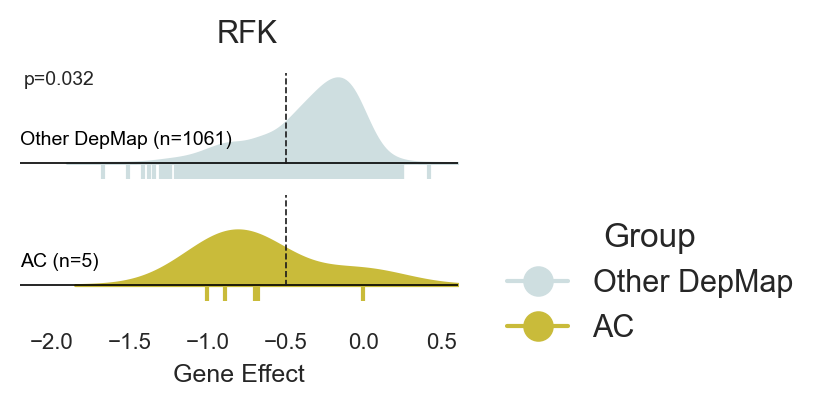

In [13]:
gene = 'RFK'
color_dic = {'Other DepMap': {'Other DepMap': '#CEDEE0'}, 'AC':{'AC': '#c9bb3a'}}
color_rug_dic = color_dic
df, p_value = Utils.prepare_data_for_hue_plots(combined_ac_otherccle_crispr_df[[gene]], ac_upset_df, label1='AC', label2='Other DepMap')
df = df.rename(columns={'value': 'Gene Effect'})

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect',  xlim_left=-2.2, xlim_right=.6, aspect=4, title='RFK',  p_value_l=[p_value], vline_offset=0.18, rug_plot_height=0.3, xtick_step=.5,levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='RFK')

## RFK vs ENPP1

p-value:  0.07728401652968886


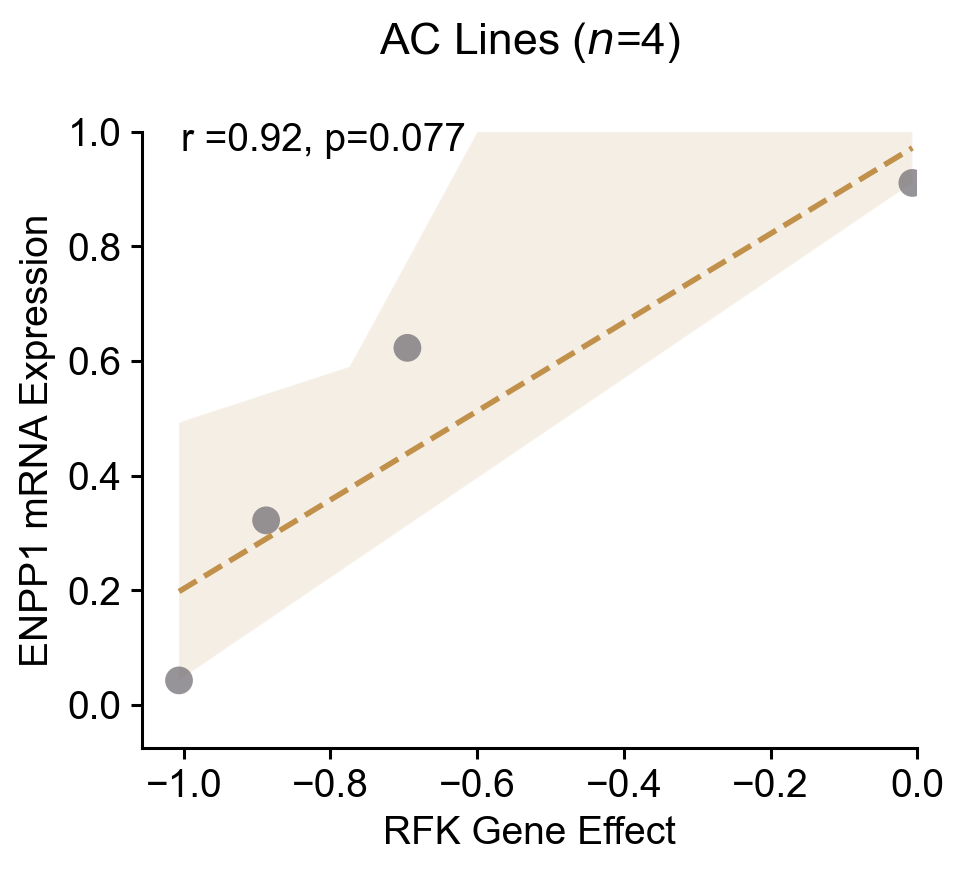

In [14]:
x_gene = 'RFK'
y_gene = 'ENPP1'
y, x = Utils.match_rows_df(ac_rna_df[[y_gene]], ac_crispr_df[[x_gene]])
df = pd.concat([y, x], axis=1)

MyVisualization.reg_plot(data_df=df, x_col=x_gene, y_col=y_gene, title=f'AC Lines ($n$={df.shape[0]})', points_color_code=points_color, line_color_code=line_color, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression', marker='o', title_height=1.1, text_height=.97,  ylim_top=1., xlim_right=0, pval_ns=False, title_fontsize=16, file_name=f'{x_gene}_{y_gene}')

# GBC

In [15]:
gbc_upset_df = upset_df[upset_df['Subtype']=='GBC']
gbc_upset_df

,Subtype,DepMap_ID,RNA
Cell_line,,,
SNU308,GBC,ACH-000141,1.0
NOZ,GBC,ACH-001607,1.0
OCUG1,GBC,ACH-001619,1.0
G415,GBC,ACH-001850,1.0
TGBC1TKB,GBC,ACH-001861,1.0
GB2,GBC,ACH-001961,1.0


## SREBF1

### BTC

p-value 0.00026009716360268596
Figure4/output_fig4/SREBF1_ridge_plot.pdf


<Figure size 300x200 with 0 Axes>

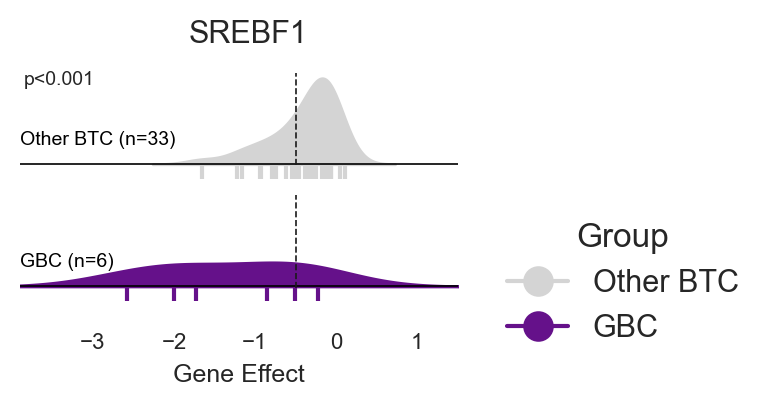

In [16]:
gene = 'SREBF1'
color_dic = {'Other BTC': {'Other BTC': '#d4d4d4'}, 'GBC':{'GBC': '#65118a'}}
color_rug_dic = color_dic
df, p_value = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], gbc_upset_df, label1='GBC', label2='Other BTC', id_vars='Cell_line')
df = df.rename(columns={'value': 'Gene Effect'})
print('p-value', p_value)
MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect',  xlim_left=-3.9, xlim_right=1.5, aspect=4, title='SREBF1',  p_value_l=[p_value], vline_offset=0.17, rug_plot_height=0.2, xtick_step=1,levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='SREBF1')

### Transcription Factor

In [17]:
tf_mat_file = 'Figure5/output_fig5/dorothea_mat_zscore.csv'
tf_mat_df = pd.read_csv(tf_mat_file, index_col=0).T
tf_mat_df.shape

(79, 275)

In [18]:
cur_upset_df = rna_upset_df.copy()
cur_upset_df['Group']='Other BTC'
cur_upset_df.loc[gbc_upset_df.index, 'Group'] = 'GBC'
df = pd.concat([cur_upset_df['Group'], tf_mat_df.loc[cur_upset_df.index, 'SREBF1']], axis=1)
df

,Group,SREBF1
Cell_line,,
SNU869,Other BTC,0.609662
SNU478,Other BTC,-0.224743
TGBC52TKB,Other BTC,-0.038660
AOVC1,Other BTC,0.685514
SNU245,Other BTC,1.497903
SNU1196,Other BTC,0.335547
EGI1,Other BTC,0.464981
KKU100,Other BTC,0.137522
TFK1,Other BTC,-0.004971


ranksum p-value=0.9577468117781149
There is no significant association.


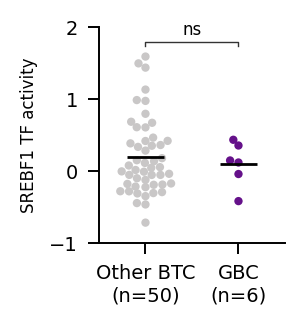

In [19]:
color_dic = {'Other BTC':'#c9c7c7', 'GBC': '#65118a'}
x = 'Group'
gene = 'SREBF1'

Utils.compare_visualize_cat_features(df, x=x, y=gene, color_dic=color_dic, y_label=f'{gene} TF activity', test='ranksum', title='', title_height=1., figure_width=1.2, figure_height=1.4, label_fontsize=6, ylim_top=2, ylim_bottom=-1, label_newline=True, save_figure=True)

### SREBF1 vs MVK

In [20]:
gbc_rna_filtered_df, gbc_gene_effect_filtered_df = Utils.match_rows_df(rna_df.loc[gbc_upset_df.index], gene_effect_df)
gbc_rna_filtered_df.shape

(6, 17649)

p-value:  0.002973545619804117


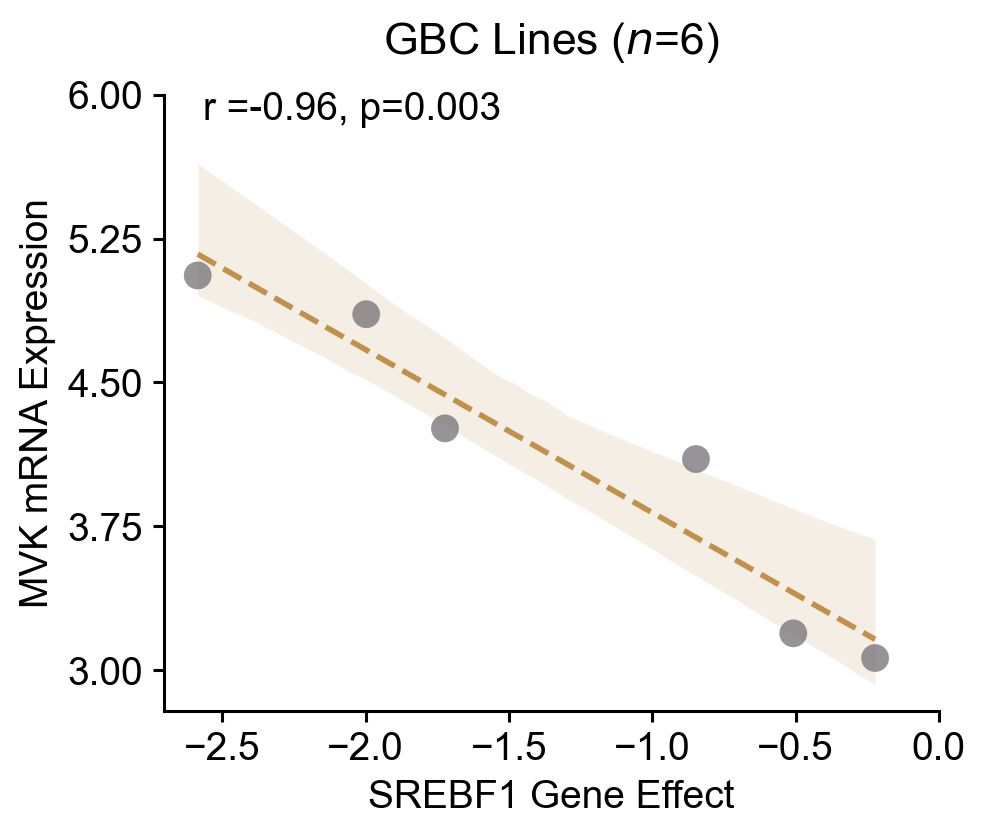

In [21]:
x_gene = 'SREBF1'
y_gene = 'MVK'
x, y = Utils.match_rows_df(gbc_rna_filtered_df[[y_gene]], gbc_gene_effect_filtered_df[[x_gene]])
df = pd.concat([x, y], axis=1)

MyVisualization.reg_plot(data_df=df, x_col=x_gene, y_col=y_gene, title=f'GBC Lines ($n$={df.shape[0]})', points_color_code=points_color, line_color_code=line_color, xlabel=f'SREBF1 Gene Effect',  ylabel=f'{y_gene} mRNA Expression', marker='o', xlim_right=0, ylim_top=6,  ytick_step=.75, title_height=1.04, text_height=.96,  file_name=f'{x_gene}_{y_gene}')

### SREBF1 Multiple Testing Corrections

In [22]:
gene = 'SREBF1'
selected_genes_dic = {'MVK':'#A63603'}
genes_file= 'Additional_Data/Selected_Lists/MHT/SREBP targets.xlsx'
hypotheses_l = MyLib.load_xls(genes_file, sheet_no=0)['GeneName'].values.tolist()
print('Number of hypotheses: ', len(hypotheses_l))


Number of hypotheses:  38


#### GBC


File  Figure4/output_fig4/gbc_SREBF1_gene_effect_corr_rna.csv saved, shape: (38, 4)


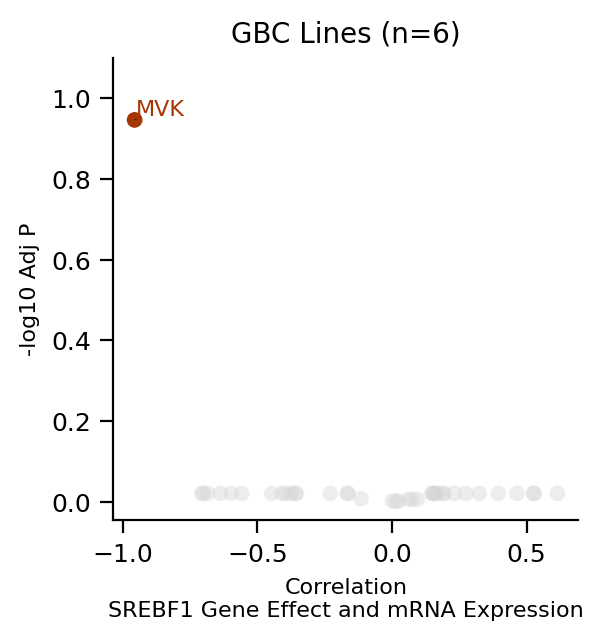

feature         MVK
corr       -0.95514
p-value    0.002974
q-value    0.112995
color       #A63603
Name: MVK, dtype: object

In [23]:
x, y = Utils.match_rows_df(gbc_gene_effect_filtered_df[[gene]], gbc_rna_filtered_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., ylim_top=1.1, selected_genes_dic=selected_genes_dic, cut_off_labels=3, save_file=f'gbc_{gene}_gene_effect_corr_rna.csv',  title=f'GBC Lines (n={y.shape[0]})', axis_label_fontsize=8, save_figure=True)
corr_res_df.loc['MVK',:]

#### Non-GBC

In [24]:
non_gbc_upset_df = upset_df[(upset_df['Subtype']!='GBC') & (upset_df['RNA']==1)]
non_gbc_upset_df

,Subtype,DepMap_ID,RNA
Cell_line,,,
SNU869,AC,ACH-000182,1.0
SNU478,AC,ACH-000377,1.0
TGBC52TKB,AC,ACH-001862,1.0
AOVC1,AC,ACH-001997,1.0
SNU1196,ECC,ACH-000461,1.0
EGI1,ECC,ACH-001494,1.0
KKU100,ECC,ACH-001536,1.0
TFK1,ECC,ACH-001673,1.0
ECC3,ECC,ACH-001841,1.0


In [25]:
non_gbc_rna_filtered_df, non_gbc_gene_effect_filtered_df = Utils.match_rows_df(rna_df.loc[non_gbc_upset_df.index], gene_effect_df)
non_gbc_rna_filtered_df.shape

(31, 17649)


File  Figure4/output_fig4/non_gbc_SREBF1_gene_effect_corr_rna.csv saved, shape: (38, 4)


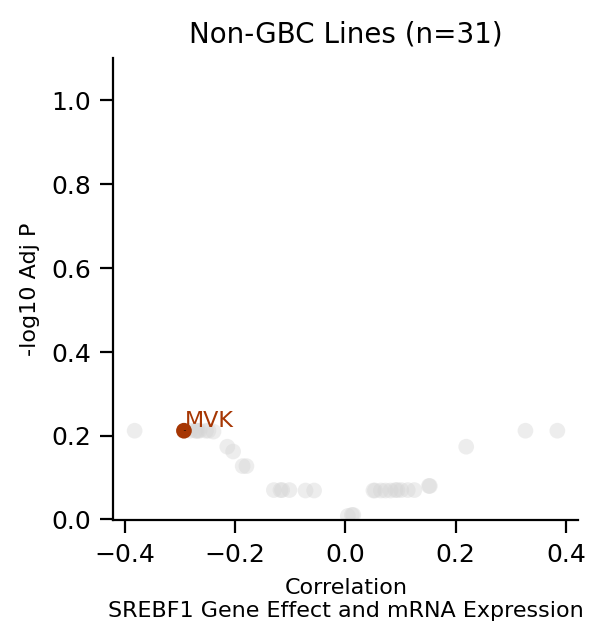

feature         MVK
corr      -0.292762
p-value    0.109979
q-value    0.614618
color       #A63603
Name: MVK, dtype: object

In [26]:
x, y = Utils.match_rows_df(non_gbc_gene_effect_filtered_df[[gene]], non_gbc_rna_filtered_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., selected_genes_dic=selected_genes_dic, cut_off_labels=3, ylim_top=1.1, save_file=f'non_gbc_{gene}_gene_effect_corr_rna.csv',  title=f'Non-GBC Lines (n={y.shape[0]})', axis_label_fontsize=8, save_figure=True)
corr_res_df.loc['MVK',:]

### GBC ranking

In [27]:
df = ccle_crispr_df[[gene]].copy()
df = df.sort_values(by=gene)
df['Rank'] = list(range(1, df.shape[0] + 1))

In [28]:
labels_text_dic = upset_df.loc[gbc_gene_effect_filtered_df.index, ['DepMap_ID']].to_dict()['DepMap_ID']
labels_text_dic

{'G415': 'ACH-001850',
 'GB2': 'ACH-001961',
 'NOZ': 'ACH-001607',
 'OCUG1': 'ACH-001619',
 'SNU308': 'ACH-000141',
 'TGBC1TKB': 'ACH-001861'}

In [29]:
df = df.rename(index={labels_text_dic[c]:c for c in labels_text_dic})
df.loc[labels_text_dic.keys(),:].sort_values(by='Rank')

,SREBF1,Rank
SNU308,-2.585545,1
G415,-1.997691,3
TGBC1TKB,-1.722885,9
GB2,-0.847266,90
OCUG1,-0.507880,206
NOZ,-0.222395,489


In [30]:
df.head(10)

,SREBF1,Rank
SNU308,-2.585545,1
ACH-000510,-2.216791,2
G415,-1.997691,3
ACH-000542,-1.965135,4
ACH-000294,-1.953377,5
ACH-000855,-1.787907,6
ACH-000367,-1.787222,7
ACH-001459,-1.753974,8
TGBC1TKB,-1.722885,9
ACH-000959,-1.670969,10


In [31]:
color_sr = pd.Series('#d4d4d4', index=df.index)
color_sr[labels_text_dic.keys()] = '#65118a'
alpha_sr = pd.Series(.4, index=df.index)
alpha_sr[labels_text_dic.keys()] = 1

saved None.pdf


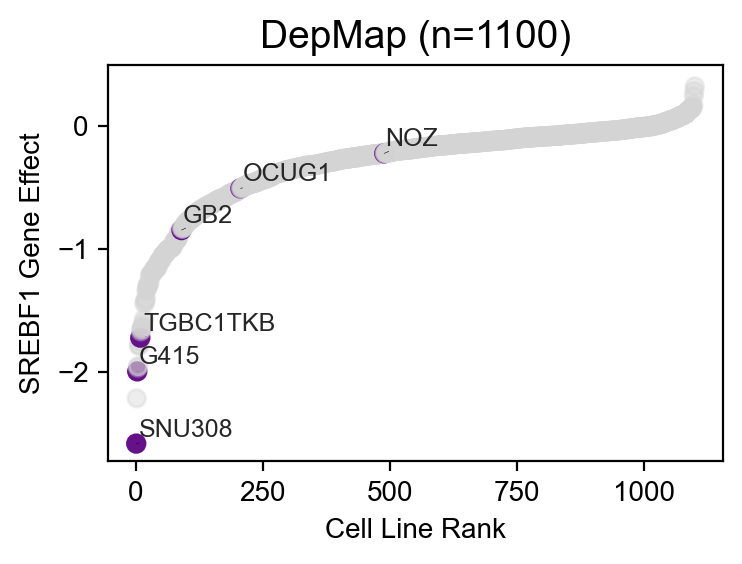

In [32]:
MyVisualization.scatter_plot_comparison(df['Rank'], df[gene], x_label='Cell Line Rank',
                                        y_label=f'{gene} Gene Effect', labels_text=list(labels_text_dic.keys()),
                                        add_text=True, text_fontsize=9, force_text=2, title=f'DepMap (n={df.shape[0]})',
                                        add_legend=False, points_size=40, ylim_top=0.5, alpha_points=alpha_sr, colors_sr=color_sr,
                                        label_fontsize=10, add_spines=True,
                                        figure_width=4, figure_height=3, save_file=True)

## PPCDC

In [33]:
gene = 'PPCDC'

### BTC

In [34]:
gene_effect_df.loc[gbc_upset_df.index, gene]

Cell_line
SNU308      0.063508
NOZ        -1.727285
OCUG1      -0.138758
G415       -1.179988
TGBC1TKB   -0.941843
GB2        -0.898297
Name: PPCDC, dtype: float64

p-value 1.118014693349672e-05
Figure4/output_fig4/PPCDC_BTC_ridge_plot.pdf


<Figure size 300x200 with 0 Axes>

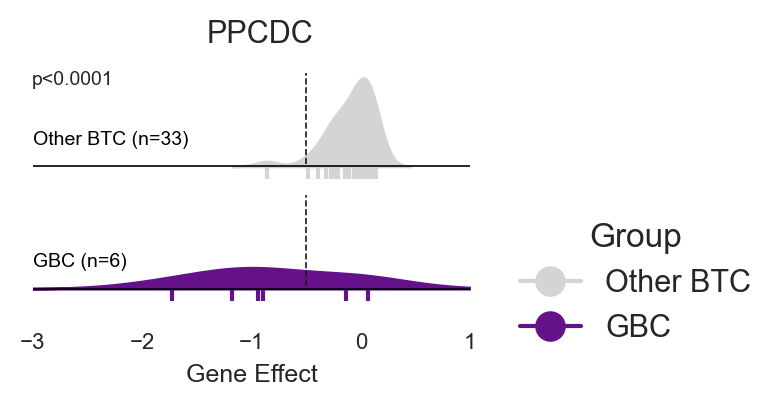

In [35]:
color_dic = {'Other BTC': {'Other BTC': '#d4d4d4'}, 'GBC':{'GBC': '#65118a'}}
color_rug_dic = color_dic
df, p_value = Utils.prepare_data_for_hue_plots(gene_effect_df[[gene]], gbc_upset_df, label1='GBC', label2='Other BTC', id_vars='Cell_line')
print('p-value', p_value)
df = df.rename(columns={'value': 'Gene Effect'})

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect',  xlim_left=-3, xlim_right=1., aspect=4, title='PPCDC',  p_value_l=[p_value], vline_offset=0.18, rug_plot_height=0.3,  xtick_step=1,levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='PPCDC_BTC')

### DepMap

In [36]:
other_ccle_crispr_df = ccle_crispr_df[~ccle_crispr_df.index.isin(upset_df['DepMap_ID'])]
print(f'other_ccle_crispr_df shape: {other_ccle_crispr_df.shape}')

other_ccle_crispr_df shape: (1061, 18443)


In [37]:
gbc_gene_effect_df = gene_effect_df.loc[gbc_upset_df.index, [gene]]
combined_gbc_otherccle_crispr_df = pd.concat([other_ccle_crispr_df[[gene]], gbc_gene_effect_df])
combined_gbc_otherccle_crispr_df.shape

(1067, 1)

Figure4/output_fig4/PPCDC_ccle_ridge_plot.pdf


<Figure size 300x200 with 0 Axes>

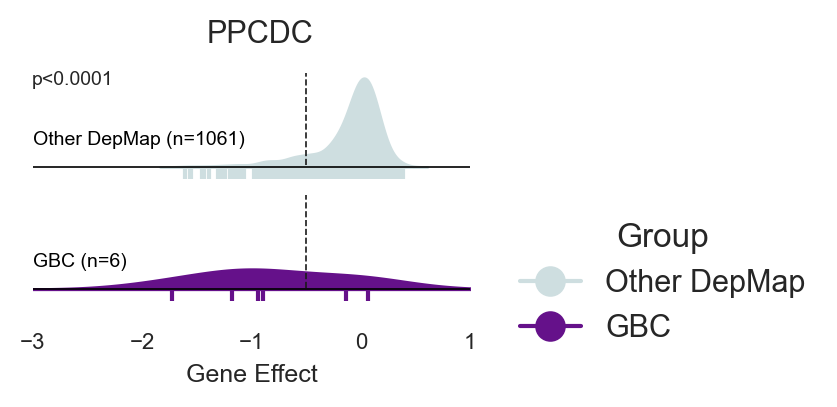

In [38]:
color_dic = {'Other DepMap': {'Other DepMap': '#CEDEE0'}, 'GBC':{'GBC': '#65118a'}}
color_rug_dic = color_dic
df, p_value = Utils.prepare_data_for_hue_plots(combined_gbc_otherccle_crispr_df[[gene]], gbc_upset_df, label1='GBC', label2='Other DepMap')
df = df.rename(columns={'value': 'Gene Effect'})

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect',  xlim_left=-3, xlim_right=1., aspect=4, title='PPCDC',  p_value_l=[p_value], vline_offset=0.17, rug_plot_height=0.3, xtick_step=1,levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='PPCDC_ccle')

# ECC

In [39]:
ecc_upset_df = upset_df[upset_df['Subtype']=='ECC']
ecc_upset_df

,Subtype,DepMap_ID,RNA
Cell_line,,,
SNU1196,ECC,ACH-000461,1.0
EGI1,ECC,ACH-001494,1.0
KKU100,ECC,ACH-001536,1.0
TFK1,ECC,ACH-001673,1.0
ECC3,ECC,ACH-001841,1.0
ECC4,ECC,ACH-001843,1.0
CCC5,ECC,ACH-002647,NaN


## NXT1

Figure4/output_fig4/NXT1_ridge_plot.pdf


<Figure size 300x200 with 0 Axes>

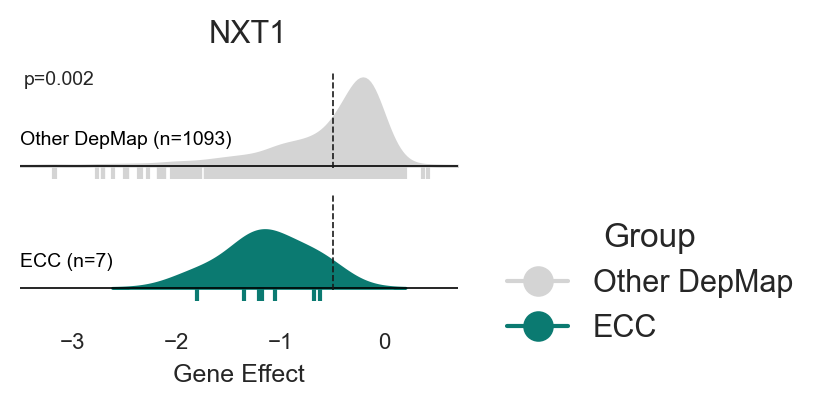

In [40]:
color_dic = {'Other DepMap':{'Other DepMap':'#d4d4d4'}, 'ECC':{'ECC': '#0b7a71'}}
color_rug_dic = color_dic
gene = 'NXT1'
df, p_value = Utils.prepare_data_for_hue_plots(ccle_crispr_df[[gene]], ecc_upset_df.set_index('DepMap_ID'), label1='ECC', label2='Other DepMap', id_vars='index')
df = df.rename(columns={'value': 'Gene Effect'})

MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect', xlim_right=0.7, xlim_left=-3.5, aspect=4, title='NXT1',  p_value_l=[p_value],  vline_offset=0.15, rug_plot_height=0.2, xtick_step=1,levels_fontsize=7, label_fontsize=9, tick_fontsize=8, file_name='NXT1')

## NXT1 vs NXT2 vs NXF1

In [41]:
rna_ecc_upset_df = upset_df[(upset_df['Subtype']=='ECC') & (upset_df['RNA']==1)]
rna_ecc_upset_df

,Subtype,DepMap_ID,RNA
Cell_line,,,
SNU1196,ECC,ACH-000461,1.0
EGI1,ECC,ACH-001494,1.0
KKU100,ECC,ACH-001536,1.0
TFK1,ECC,ACH-001673,1.0
ECC3,ECC,ACH-001841,1.0
ECC4,ECC,ACH-001843,1.0


In [42]:
df = pd.DataFrame(columns=['Cell_line', 'Gene', 'value', 'Group'])
p_values = []
for gene in ['NXT1', 'NXT2', 'NXF1']:
    cur_df, p_val = Utils.prepare_data_for_hue_plots(rna_df[[gene]], rna_ecc_upset_df, label1='ECC', label2='Other BTC', test='ranksum', id_vars='Cell_line')
    df = pd.concat([df, cur_df])
    # p_values.append(f'$p$-value={p_val:.2f}')
    p_values.append(p_val)

In [43]:
p_values

[0.2833289053620959, 0.04995981456881511, 0.011848940928347452]

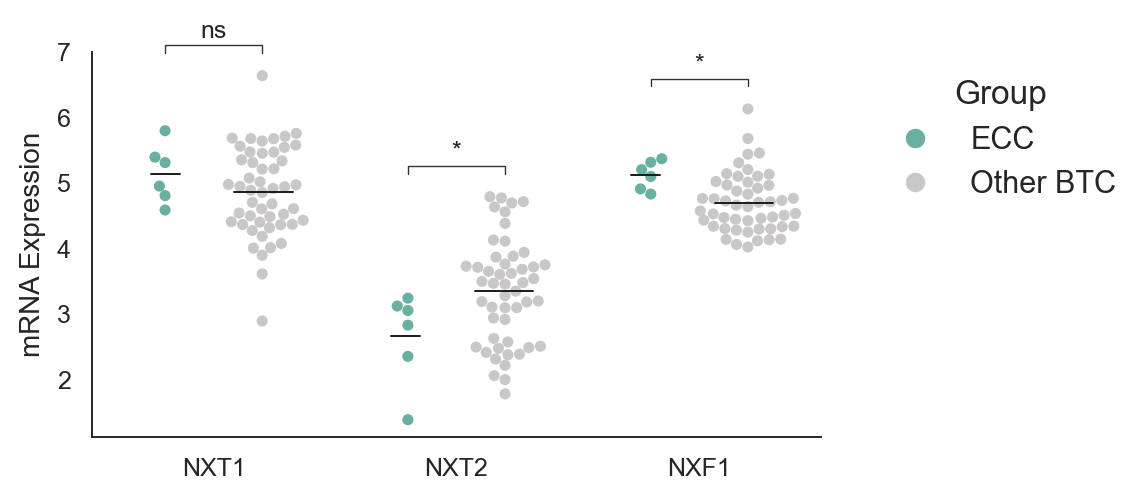

In [44]:
order = ['NXT1', 'NXT2', 'NXF1']
hue_order = ['ECC', 'Other BTC']
palette = {'ECC': '#6ab0a2', 'Other BTC': '#c9c7c7'}
pairs = [[('NXT1', 'ECC'), ('NXT1', 'Other BTC')],
         [('NXT2', 'ECC'), ('NXT2', 'Other BTC')],
         [('NXF1', 'ECC'), ('NXF1', 'Other BTC')],
         ]
MyVisualization.swarm_plot_paired(df, x='Gene', y='value', hue='Group', palette=palette, hue_order=hue_order, order=order, title='', ylabel='mRNA Expression', p_values=p_values, pairs=pairs,  ylim_top=7, figure_widht=4.7, figure_height=2.5, save_figure=True)

## NXT1 vs NXT2

In [45]:
gene = 'NXT1'
y_gene = 'NXT2'
palette = {'ECC': '#0b7a71', 'Other BTC': '#c9c7c7'}
x, y = Utils.match_rows_df(gene_effect_df[[gene]], rna_df[[y_gene]])
df = pd.concat([x, y], axis=1)
df['Group'] = 'Other BTC'
df.loc[rna_ecc_upset_df.index, 'Group'] = 'ECC'
df

Gene,NXT1,NXT2,Group
Cell_line,,,
AOVC1,-0.013274,3.495695,Other BTC
CCLP1,-1.002327,3.726831,Other BTC
CCSW1,-0.042596,4.126808,Other BTC
ECC3,-1.206618,3.240314,ECC
ECC4,-0.617766,3.119356,ECC
EGI1,-1.352098,1.384050,ECC
G415,-0.205172,4.713146,Other BTC
GB2,-0.139790,4.557042,Other BTC
HKGZCC,-0.218017,3.648465,Other BTC


p-value:  0.001660364400172175


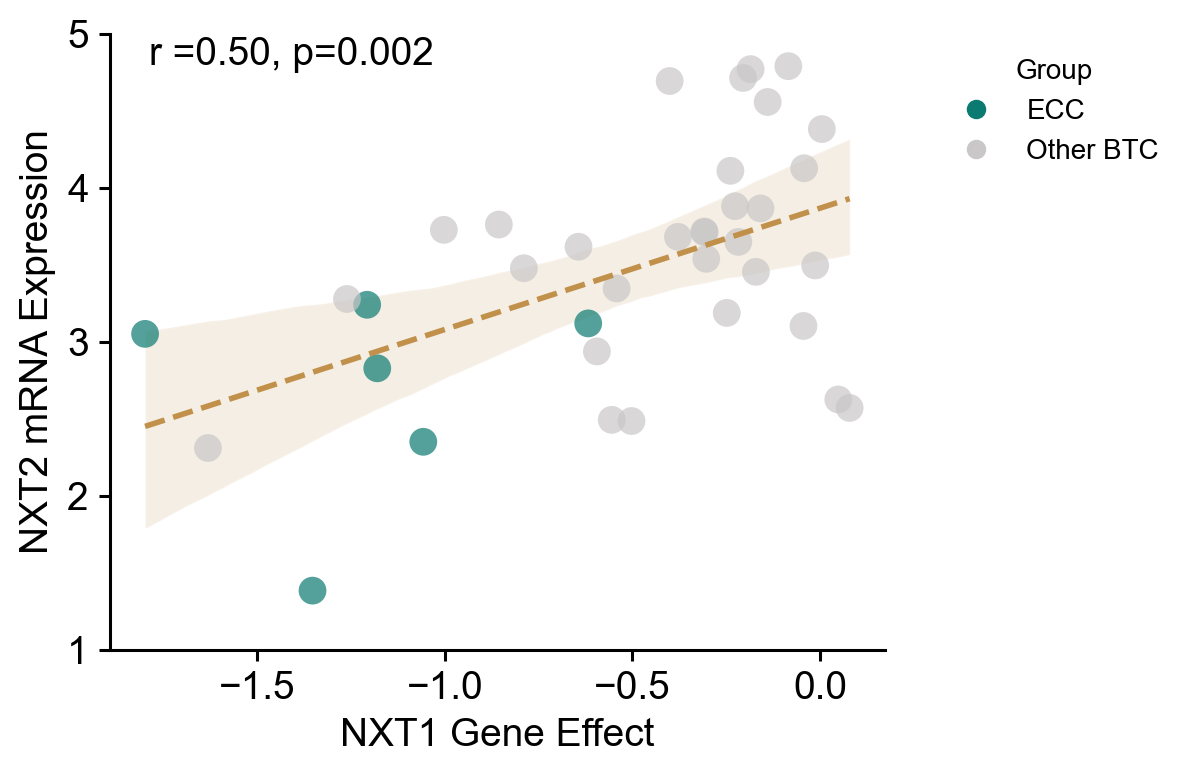

In [46]:
MyVisualization.reg_plot(df, x_col=gene, y_col=y_gene, hue='Group', palette=palette, xlabel=f'NXT1 Gene Effect', ylabel='NXT2 mRNA Expression', marker='o',  text_height=.95, ylim_top=5, ytick_step=1., ylim_bottom=1, line_color_code='#C1914B',  add_legend=True, file_name=f'{gene}_{y_gene}')